In [25]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [50]:
# problem6 part a
import random


def simulate_roulette(N):
    total_slots = 38
    black_slots = 18
    total_earnings = 0
    for _ in range(N):
        outcome = random.randint(0, total_slots - 1)
        if outcome < black_slots:
            total_earnings += 1
        else:
            total_earnings -= 1
    return total_earnings


N = 1000
total_earnings = simulate_roulette(N)
print(f"total earnings after {N} rounds: {total_earnings} dollars")


total earnings after 1000 rounds: -56 dollars


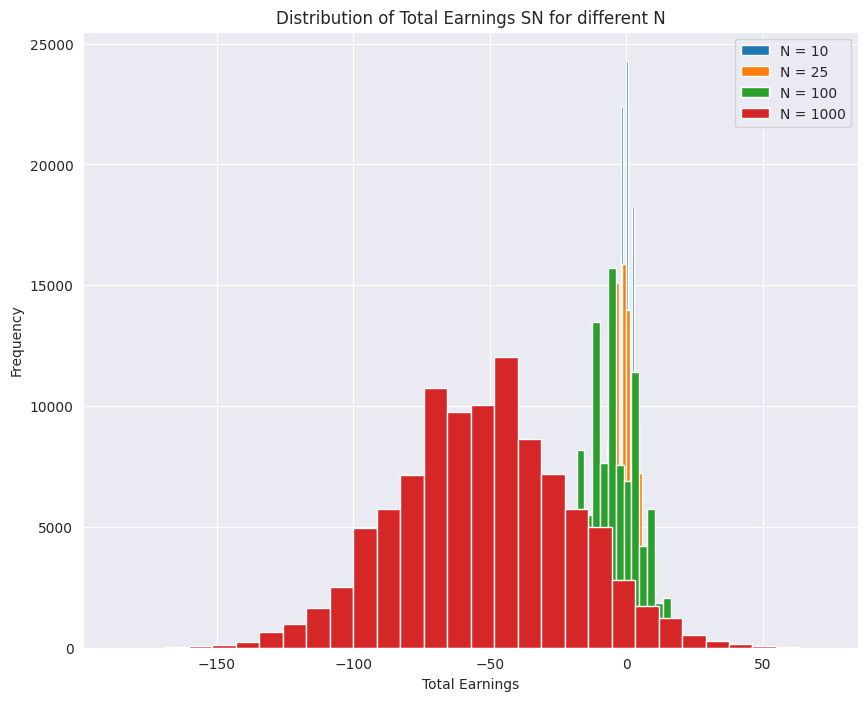

For N = 10, Expected Value: -0.53, Standard Error: 0.0100
For N = 25, Expected Value: -1.31, Standard Error: 0.0158
For N = 100, Expected Value: -5.25, Standard Error: 0.0317
For N = 1000, Expected Value: -52.69, Standard Error: 0.0994

با افزایش تعداد دورهای بازی (N) توزیع مجموع درآمد به یک توزیع نرمال نزدیک می‌شود طبق قضیه مرکزی حدی. امیدریاضی برای بازی رولت منفی است به دلیل وجود خانه‌های سبز و این مقدار با افزایش N به مقدار منفی ثابت نزدیک می‌شود. همچنین انحراف معیار یا خطای استاندارد با افزایش N کاهش می‌یابد که نشان می‌دهد پراکندگی نتایج کمتر می‌شود و داده‌ها به امیدریاضی نزدیک‌تر می‌شوند. ولی با بیشتر شدن تعداد دورها دقت پیش‌بینی و پایداری نتایج بهبود می‌یابد.                                                                                      



In [20]:
# problem6 part b
def monte_carlo_simulation(N, num_simulations):
    earnings = []
    for _ in range(num_simulations):
        earnings.append(simulate_roulette(N))
    return np.array(earnings)


N_values = [10, 25, 100, 1000]
num_simulations = 100000

plt.figure(figsize=(10, 8))

for N in N_values:
    earnings = monte_carlo_simulation(N, num_simulations)
    plt.hist(earnings, bins=30, label=f'N = {N}')

plt.title('distribution of total Earnings SN for different N')
plt.xlabel('Total Earnings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

for N in N_values:
    earnings = monte_carlo_simulation(N, num_simulations)
    expected_value = np.mean(earnings)
    std_error = np.std(earnings) / np.sqrt(num_simulations)
    print(f"For N = {N}, Expected Value: {expected_value:.2f}, Standard Error: {std_error:.4f}")

print("""
با افزایش تعداد دورهای بازی (N) توزیع مجموع درآمد به یک توزیع نرمال نزدیک می‌شود طبق قضیه مرکزی حدی. امیدریاضی برای بازی رولت منفی است به دلیل وجود خانه‌های سبز و این مقدار با افزایش N به مقدار منفی ثابت نزدیک می‌شود. همچنین انحراف معیار یا خطای استاندارد با افزایش N کاهش می‌یابد که نشان می‌دهد پراکندگی نتایج کمتر می‌شود و داده‌ها به امیدریاضی نزدیک‌تر می‌شوند. ولی با بیشتر شدن تعداد دورها دقت پیش‌بینی و پایداری نتایج بهبود می‌یابد.                                                                                      
""")

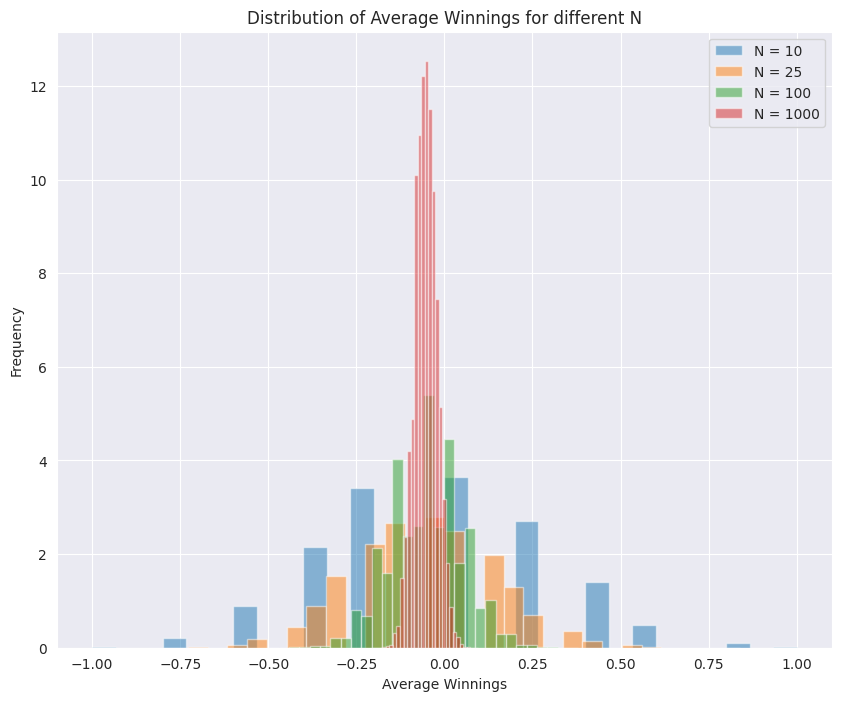

For N = 10, Expected Value: -0.0514, Standard Error: 0.0010
For N = 25, Expected Value: -0.0524, Standard Error: 0.0006
For N = 100, Expected Value: -0.0524, Standard Error: 0.0003
For N = 1000, Expected Value: -0.0526, Standard Error: 0.0001

با افزایش N امیدریاضی میانگین بردها به صفر نزدیک‌تر می‌شود، که نشان‌دهنده‌ی نزدیک شدن میانگین به مقدار واقعی است. انحراف معیار استاندارد (Standard Error) نیز با افزایش N کاهش می‌یابد، زیرا واریانس میانگین‌ها کمتر می‌شود. توزیع میانگین بردها برای N=10 ممکن است پخش و یا کج باشد، اما برای N=1000 به توزیع نرمال نزدیک می‌شود، مطابق با نظریه‌ی حد مرکزی. در نتیجه، با افزایش N توزیع میانگین بردها حول صفر متمرکزتر شده.




In [22]:
# problem6 part c
def monte_carlo_simulation(N, num_simulations=100000):
    avg_earnings = []
    for _ in range(num_simulations):
        total_earnings = simulate_roulette(N)
        avg_earnings.append(total_earnings / N)
    return np.array(avg_earnings)


N_values = [10, 25, 100, 1000]
num_simulations = 100000

plt.figure(figsize=(10, 8))

for N in N_values:
    avg_earnings = monte_carlo_simulation(N, num_simulations)
    plt.hist(avg_earnings, bins=30, alpha=0.5, label=f'N = {N}', density=True)

plt.title('distribution of average winnings for different N')
plt.xlabel('Average Winnings')
plt.ylabel('frequency')
plt.legend()
plt.show()

for N in N_values:
    avg_earnings = monte_carlo_simulation(N, num_simulations)
    expected_value = np.mean(avg_earnings)
    std_error = np.std(avg_earnings) / np.sqrt(num_simulations)
    print(f"for N = {N}, Expected Value: {expected_value:.4f}, Standard Error: {std_error:.4f}")

print("""
با افزایش N امیدریاضی میانگین بردها به صفر نزدیک‌تر می‌شود، که نشان‌دهنده‌ی نزدیک شدن میانگین به مقدار واقعی است. انحراف معیار استاندارد (Standard Error) نیز با افزایش N کاهش می‌یابد، زیرا واریانس میانگین‌ها کمتر می‌شود. توزیع میانگین بردها برای N=10 ممکن است پخش و یا کج باشد، اما برای N=1000 به توزیع نرمال نزدیک می‌شود، مطابق با نظریه‌ی حد مرکزی. در نتیجه، با افزایش N توزیع میانگین بردها حول صفر متمرکزتر شده.

""")

In [51]:
# problem6 part d
def monte_carlo_simulation(N, num_simulations):
    earnings = []
    for _ in range(num_simulations):
        earnings.append(simulate_roulette(N))
    return np.array(earnings)


def theoretical_values(N):
    expected_value = -N / 19
    standard_error = np.sqrt(N * 360 / 361)
    return expected_value, standard_error


N_values = [10, 25, 100, 1000]
num_simulations = 100000

for N in N_values:
    # Monte Carlo simulation
    earnings = monte_carlo_simulation(N, num_simulations)
    expected_value_sim = np.mean(earnings)
    std_error_sim = np.std(earnings) / np.sqrt(N)

    # Theoretical values
    expected_value_theoretical, std_error_theoretical = theoretical_values(N)

    print(f"For N = {N}:")
    print(
        f"  simulated expected value: {expected_value_sim:.4f}, theoretical expected Value: {expected_value_theoretical:.4f}")
    print(f"  simulated Standard Error: {std_error_sim:.6f}, Theoretical Standard Error: {std_error_theoretical:.6f}")
    print(f"  difference in Expected Value: {expected_value_sim - expected_value_theoretical:.4f}")
    print(f"  difference in Standard Error: {std_error_sim - std_error_theoretical:.6f}\n")

For N = 10:
  simulated expected value: -0.5158, theoretical expected Value: -0.5263
  simulated Standard Error: 0.997740, Theoretical Standard Error: 3.157895
  difference in Expected Value: 0.0105
  difference in Standard Error: -2.160155

For N = 25:
  simulated expected value: -1.2973, theoretical expected Value: -1.3158
  simulated Standard Error: 0.997763, Theoretical Standard Error: 4.993070
  difference in Expected Value: 0.0185
  difference in Standard Error: -3.995307

For N = 100:
  simulated expected value: -5.3115, theoretical expected Value: -5.2632
  simulated Standard Error: 0.997232, Theoretical Standard Error: 9.986140
  difference in Expected Value: -0.0484
  difference in Standard Error: -8.988907

For N = 1000:
  simulated expected value: -52.5558, theoretical expected Value: -52.6316
  simulated Standard Error: 0.999930, Theoretical Standard Error: 31.578947
  difference in Expected Value: 0.0757
  difference in Standard Error: -30.579017



Theoretical Probability (CLT): 0.5000
Simulated Probability: 0.6018


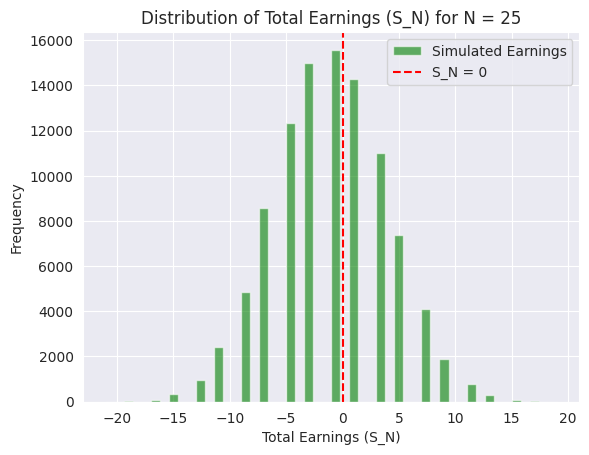

In [28]:
N = 25
earnings_simulation = monte_carlo_simulation(N, num_simulations)

# mont carlo
simulation_probability_casino_loses = np.mean(earnings_simulation < 0)

# CLT
std_N = standard_error = np.sqrt(N * 360 / 361)
theoretical_probability_casino_loses_clt = stats.norm.cdf(0, loc=0, scale=std_N)

print(f"Theoretical Probability (CLT): {theoretical_probability_casino_loses_clt:.4f}")
print(f"Simulated Probability: {simulation_probability_casino_loses:.4f}")

# Plot the distribution of the total earnings from the simulation
plt.hist(earnings_simulation, bins=50, alpha=0.6, color='g', label="Simulated Earnings")
plt.axvline(x=0, color='r', linestyle='--', label="S_N = 0")
plt.title("Distribution of Total Earnings (S_N) for N = 25")
plt.xlabel("Total Earnings (S_N)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


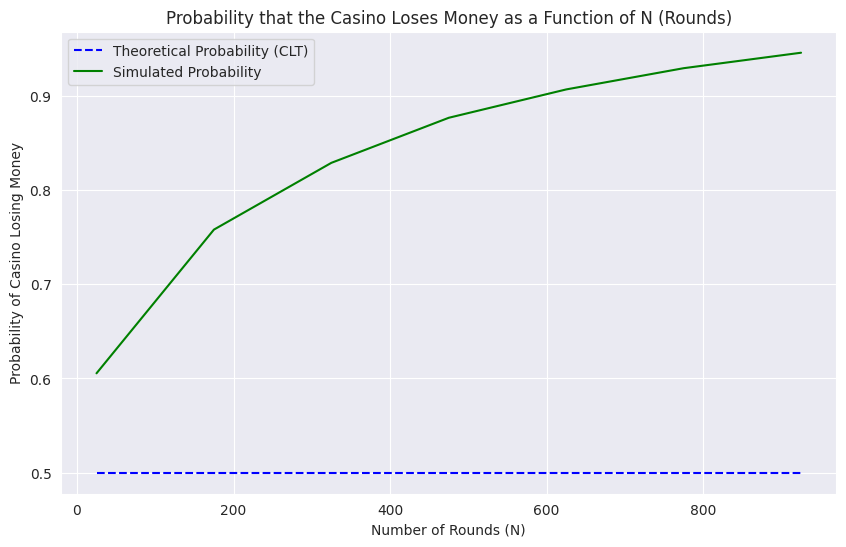

In [30]:
def theoretical_probability_casino_loses_clt(N):
    std_N = np.sqrt(N * 360 / 361)
    probability_casino_loses_clt = stats.norm.cdf(0, loc=0, scale=std_N)
    return probability_casino_loses_clt


N_values = np.arange(25, 1001, 150)
probability_clt = []
probability_simulation = []

for N in N_values:
    # Theoretical probability (CLT)
    prob_clt = theoretical_probability_casino_loses_clt(N)
    probability_clt.append(prob_clt)
    # Monte Carlo simulation probability
    earnings_simulation = monte_carlo_simulation(N, num_simulations)
    prob_simulation = np.mean(earnings_simulation < 0)
    probability_simulation.append(prob_simulation)

plt.figure(figsize=(10, 6))
plt.plot(N_values, probability_clt, label="Theoretical Probability (CLT)", color='b', linestyle='--')
plt.plot(N_values, probability_simulation, label="Simulated Probability", color='g')
plt.title("Probability that the Casino Loses Money as a Function of N (Rounds)")
plt.xlabel("Number of Rounds (N)")
plt.ylabel("Probability of Casino Losing Money")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Problem 7part 1
import pandas as pd
import numpy as np
from scipy.stats import norm

df = pd.read_csv('data/2016-general-election-trump-vs-clinton.csv')
df = df.dropna(subset=['Number of Observations'])
df['Number of Observations'] = df['Number of Observations'].astype(int)


def confidence_interval(p_hat, n):
    SE = np.sqrt((p_hat * (1 - p_hat)) / n)
    z_score = norm.ppf(0.975)
    margin_of_error = z_score * SE
    CI_lower = p_hat - margin_of_error
    CI_upper = p_hat + margin_of_error
    return CI_lower, CI_upper


df['confidence Interval Lower'] = np.nan
df['confidence Interval Upper'] = np.nan
for index, row in df.iterrows():
    p_hat = row['Clinton'] / 100
    n = row['Number of Observations']
    CI_lower, CI_upper = confidence_interval(p_hat, n)
    df.at[index, 'confidence interval Lower'] = CI_lower
    df.at[index, 'Confidence interval Upper'] = CI_upper
print(df[['Clinton', 'Confidence Interval Lower', 'Confidence Interval Upper']])


      Clinton  Confidence Interval Lower  Confidence Interval Upper
0        45.0                   0.418197                   0.481803
4        41.0                   0.381027                   0.438973
5        45.0                   0.433902                   0.466098
6        90.0                   0.884240                   0.915760
7         4.0                   0.028472                   0.051528
...       ...                        ...                        ...
1516     12.0                   0.078452                   0.161548
1517     45.0                   0.390215                   0.509785
1518     50.0                   0.476308                   0.523692
1519     89.0                   0.867577                   0.912423
1520      9.0                   0.068474                   0.111526

[1013 rows x 3 columns]


In [53]:
# Problem 7part 2
import numpy as np
from scipy.stats import norm

p = 0.47
N = 30
iterations = 100000
coverage_count = 0

for _ in range(iterations):
    sample = np.random.binomial(n=N, p=p, size=1) / N
    p_hat = sample[0]
    CI_lower, CI_upper = confidence_interval(p_hat, N)
    if CI_lower <= p <= CI_upper:
        coverage_count += 1
coverage_percentage = (coverage_count / iterations) * 100
print(f"confidence interval  proportion p = {p} in {coverage_percentage:.2f}% of the iterations.")


confidence interval  proportion p = 0.47 in 93.29% of the iterations.


In [34]:
## Problem 7part 3
df_trump = df[['Trump', 'Pollster', 'Start Date', 'Number of Observations']].dropna(subset=['Number of Observations'])
df_clinton = df[['Clinton', 'Pollster', 'Start Date', 'Number of Observations']].dropna(
    subset=['Number of Observations'])
df_clean_trump = df_trump.dropna(subset=['Number of Observations'])
df_clean_clinton = df_clinton.dropna(subset=['Number of Observations'])
print(df_clean_trump.head())
print("=" * 150)
print(df_clean_clinton.head())


   Trump          Pollster  Start Date  Number of Observations
0   41.0     Insights West  2016-11-04                     940
4   43.0          IBD/TIPP  2016-11-04                    1107
5   41.0  YouGov/Economist  2016-11-04                    3669
6    6.0  YouGov/Economist  2016-11-04                    1392
7   84.0  YouGov/Economist  2016-11-04                    1110
   Clinton          Pollster  Start Date  Number of Observations
0     45.0     Insights West  2016-11-04                     940
4     41.0          IBD/TIPP  2016-11-04                    1107
5     45.0  YouGov/Economist  2016-11-04                    3669
6     90.0  YouGov/Economist  2016-11-04                    1392
7      4.0  YouGov/Economist  2016-11-04                    1110


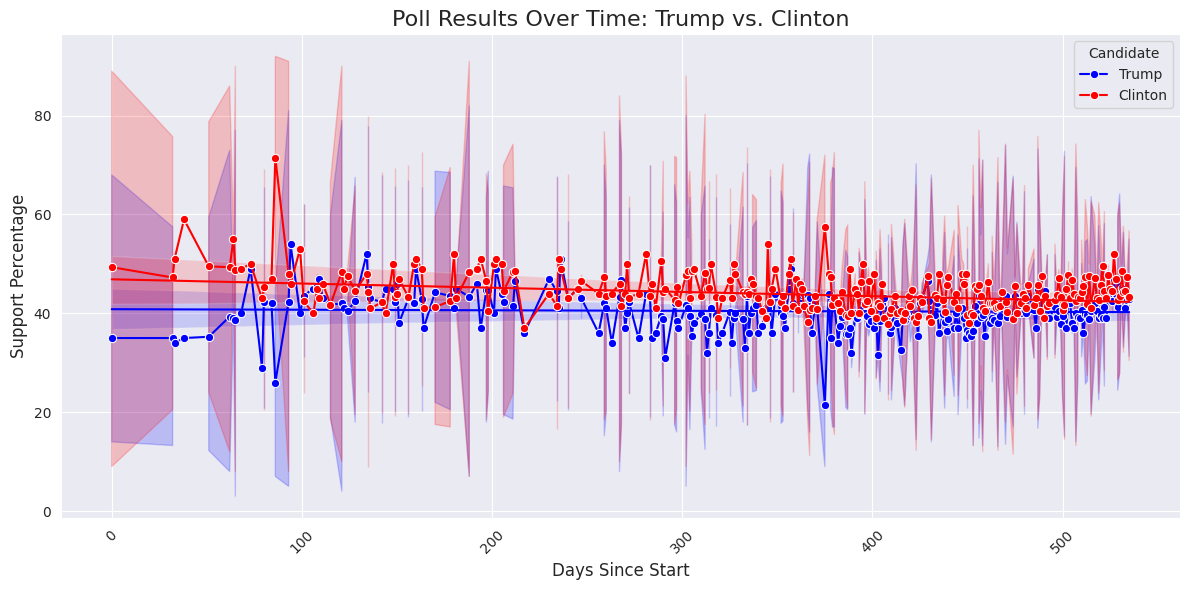

In [46]:
# problem 7part 4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_clean_trump['Start Date'] = pd.to_datetime(df_clean_trump['Start Date'])
df_clean_clinton['Start Date'] = pd.to_datetime(df_clean_clinton['Start Date'])

df_clean_trump['Trump'] = pd.to_numeric(df_clean_trump['Trump'], errors='coerce')
df_clean_clinton['Clinton'] = pd.to_numeric(df_clean_clinton['Clinton'], errors='coerce')

df_clean_trump['days_since_start'] = (df_clean_trump['Start Date'] - df_clean_trump['Start Date'].min()).dt.days
df_clean_clinton['days_since_start'] = (df_clean_clinton['Start Date'] - df_clean_clinton['Start Date'].min()).dt.days

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_clean_trump, x='days_since_start', y='Trump', label='Trump', color='blue', marker='o')
sns.regplot(data=df_clean_trump, x='days_since_start', y='Trump', scatter=False, color='blue',
            line_kws={'color': 'blue', 'linewidth': 1.5})

sns.lineplot(data=df_clean_clinton, x='days_since_start', y='Clinton', label='Clinton', color='red', marker='o')
sns.regplot(data=df_clean_clinton, x='days_since_start', y='Clinton', scatter=False, color='red',
            line_kws={'color': 'red', 'linewidth': 1.5})

plt.title('Poll Results Over Time: Trump vs. Clinton', fontsize=16)
plt.xlabel('Days Since Start', fontsize=12)
plt.ylabel('Support Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()

plt.show()


In [47]:
# Problem 7part 5
df_clean = df.dropna(subset=['Number of Observations'])

total_voters = df_clean['Number of Observations'].sum()

print(f"Total number of voters observed: {total_voters}")


Total number of voters observed: 1940931


In [21]:
# Problem 7part 6
import pandas as pd

trump_proportion = df['Trump'].mean() / 100
clinton_proportion = df['Clinton'].mean() / 100

proportions = pd.DataFrame({
    'Candidate': ['Donald Trump', 'Hillary Clinton'],
    'Estimated Proportion of Voters': [trump_proportion, clinton_proportion]
})
print(proportions)


         Candidate  Estimated Proportion of Voters
0     Donald Trump                        0.406439
1  Hillary Clinton                        0.427339


In [22]:
# Problem 7part 7
import pandas as pd

mean_trump = df['Trump'].mean() / 100
mean_clinton = df['Clinton'].mean() / 100

num_of_trump_polls = df['Trump'].notna().sum()
num_of_clinton_polls = df['Clinton'].notna().sum()

confidence_interval_trump_lower, confidence_interval_trump_upper = confidence_interval(mean_trump, num_of_trump_polls)
confidence_interval_clinton_lower, confidence_interval_clinton_upper = confidence_interval(mean_clinton,
                                                                                           num_of_clinton_polls)

# نمایش نتایج
print(
    f"Trump: mean = {mean_trump * 100:.3f}%, confidence interval = ({confidence_interval_trump_lower * 100:.3f}%, {confidence_interval_trump_upper * 100:.2f}%)")
print(
    f"Clinton: mean = {mean_clinton * 100:.3f}%, confidence interval = ({confidence_interval_clinton_lower * 100:.3f}%, {confidence_interval_clinton_upper * 100:.2f}%)")


Trump: mean = 40.644%, confidence interval = (38.176%, 43.11%)
Clinton: mean = 42.734%, confidence interval = (40.249%, 45.22%)


In [48]:
# Problem 7part 8
import numpy as np
from scipy import stats

p_hat_clinton = mean_clinton / 100
N_clinton = len(df_clinton)

standard_error_p_hat_clinton = np.sqrt(p_hat_clinton * (1 - p_hat_clinton) / N_clinton)

estimated_d = 2 * p_hat_clinton - 1

confidence_interval_d_lower = estimated_d - 1.96 * (2 * standard_error_p_hat_clinton)
confidence_interval_d_upper = estimated_d + 1.96 * (2 * standard_error_p_hat_clinton)

print(f"estimated d = {estimated_d:.3f}")
print(f"confidence interval for d: ({confidence_interval_d_lower:.3f}, {confidence_interval_d_upper:.3f})")

z_test = estimated_d / (2 * standard_error_p_hat_clinton)
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_test)))

print(f"test statistic (z) = {z_test:.3f}")
print(f"p-value = {p_value:.3f}")

if p_value < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")


estimated d = -0.991
confidence interval for d: (-0.999, -0.983)
test statistic (z) = -241.875
p-value = 0.000
reject the null hypothesis


In [2]:
# problem 12 part a
import numpy as np


def compute_mle_gamma(n, alpha):
    beta_true = 2
    data = np.random.gamma(alpha, 1 / beta_true, n)
    sample_mean = np.mean(data)
    beta_mle = alpha / sample_mean
    fisher_info = n * alpha / (beta_true ** 2)
    return beta_mle, sample_mean, fisher_info


# Parameters
n_200 = 200
n_1000 = 1000
alpha = 5

# Compute for n = 200 and n = 1000
beta_mle_200, sample_mean_200, fisher_info_200 = compute_mle_gamma(n_200, alpha)
beta_mle_1000, sample_mean_1000, fisher_info_1000 = compute_mle_gamma(n_1000, alpha)

print(f"for n = 200:")
print(f"sample mean: {sample_mean_200:.4f}")
print(f"MLE for β: {beta_mle_200:.4f}")
print(f"Fisher Information: {fisher_info_200:.4f}")
print("\n")

print(f"For n = 1000:")
print(f"sample mean: {sample_mean_1000:.4f}")
print(f"MLE for β: {beta_mle_1000:.4f}")
print(f"Fisher Information: {fisher_info_1000:.4f}")


for n = 200:
sample mean: 2.4886
MLE for β: 2.0092
Fisher Information: 250.0000


For n = 1000:
sample mean: 2.5185
MLE for β: 1.9853
Fisher Information: 1250.0000


In [3]:
# problem 12 part c
import numpy as np
import scipy.stats as stats

alpha = 2
beta_true = 3

n_values = [200, 1000]


def generate_data(n, alpha, beta):
    return np.random.gamma(alpha, beta, n)


def mle_beta(data, alpha):
    return alpha / np.mean(data)


def confidence_interval_mle(beta_hat, alpha, n):
    se = beta_hat / (np.sqrt(n * alpha))
    lower = beta_hat - 1.96 * se
    upper = beta_hat + 1.96 * se
    return lower, upper


def credible_interval_bayesian(data, alpha, n, prior_lambda=1, prior_theta=1):
    posterior_alpha = alpha + n
    posterior_theta = 1 / (1 / beta_true + np.mean(data))
    posterior_samples = np.random.gamma(posterior_alpha, posterior_theta, 10000)
    lower = np.percentile(posterior_samples, 2.5)
    upper = np.percentile(posterior_samples, 97.5)
    return lower, upper


for n in n_values:
    data = generate_data(n, alpha, beta_true)

    beta_hat = mle_beta(data, alpha)

    ci_lower, ci_upper = confidence_interval_mle(beta_hat, alpha, n)

    ci_bayesian_lower, ci_bayesian_upper = credible_interval_bayesian(data, alpha, n)

    print(f"Sample size (n = {n}):")
    print(f"  - MLE for β: {beta_hat:.4f}")
    print(f"  - 95% Confidence Interval (MLE): ({ci_lower:.4f}, {ci_upper:.4f})")
    print(f"  - 95% Credible Interval (Bayesian): ({ci_bayesian_lower:.4f}, {ci_bayesian_upper:.4f})")
    print()


Sample size (n = 200):
  - MLE for β: 0.3475
  - 95% Confidence Interval (MLE): (0.3135, 0.3816)
  - 95% Credible Interval (Bayesian): (28.7152, 37.7535)

Sample size (n = 1000):
  - MLE for β: 0.3466
  - 95% Confidence Interval (MLE): (0.3314, 0.3618)
  - 95% Credible Interval (Bayesian): (154.2508, 174.3554)



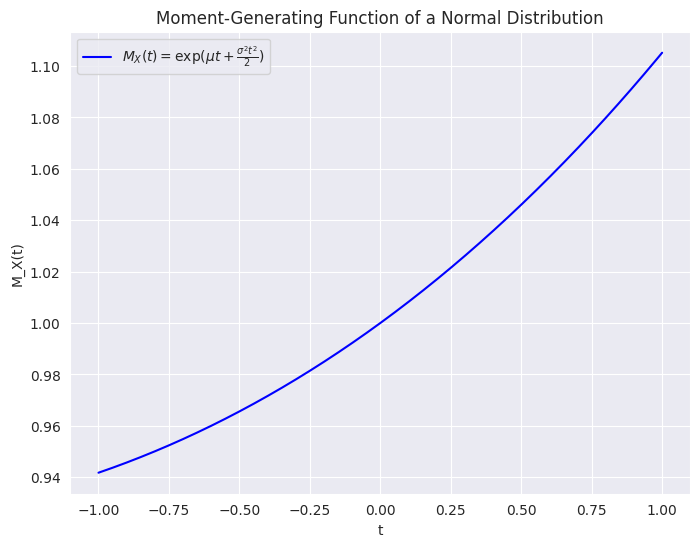

In [40]:
# problem13 part a
import numpy as np
import matplotlib.pyplot as plt

mu = 0.08
sigma = 0.2


def mgf_normal(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma ** 2 * t ** 2)


t_values = np.linspace(-1, 1, 400)
mgf_values = mgf_normal(t_values, mu, sigma)

plt.figure(figsize=(8, 6))
plt.plot(t_values, mgf_values, label=r'$M_X(t) = \exp(\mu t + \frac{\sigma^2 t^2}{2})$', color='blue')
plt.title('Moment-Generating Function of a Normal Distribution')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.grid(True)
plt.legend()
plt.show()


Numerical first derivative (E[X]) at t=0: 0.08
Numerical second derivative (M_X''(0)) at t=0: 0.04000000000000001
Analytical mean: 0.08
Analytical variance: 0.04000000000000001
Numerical variance: 0.033600000000000005


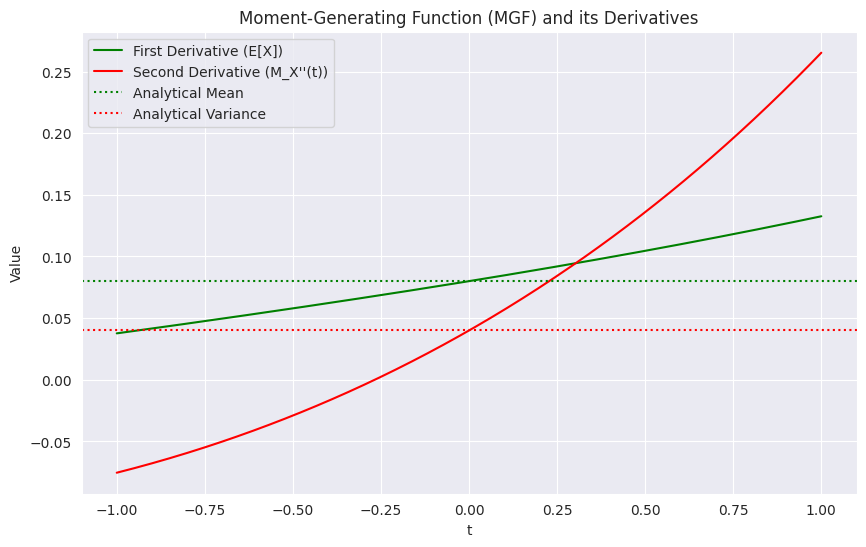


تفاوت بین نتایج عددی و تحلیلی به دلیل خطای تقریب در مشتق‌گیری عددی است که ناشی از استفاده از روش‌های عددی مانند تفاضلات محدود برای محاسبه مشتق‌هاست. در نتیجه، ممکن است مقادیر عددی و تحلیلی کمی تفاوت داشته باشند، مخصوصاً برای واریانس. در این مورد، واریانس عددی (0.0336) کمی کمتر از واریانس تحلیلی (0.04) است.                                                                                                                  



In [42]:
# Problem 13 part b
def first_derivative_mgf(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma ** 2 * t ** 2) * (mu + sigma ** 2 * t)


def second_derivative_mgf(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma ** 2 * t ** 2) * (sigma ** 2 * (t ** 2 + 1) + 2 * mu * t)


t = 0
first_derivative = first_derivative_mgf(t, mu, sigma)
second_derivative = second_derivative_mgf(t, mu, sigma)

print(f"Numerical first derivative (E[X]) at t=0: {first_derivative}")
print(f"Numerical second derivative (M_X''(0)) at t=0: {second_derivative}")

analytical_mean = mu
analytical_variance = sigma ** 2

print(f"Analytical mean: {analytical_mean}")
print(f"Analytical variance: {analytical_variance}")

# Verify the variance using the second derivative (Var(X) = M_X''(0) - (M_X'(0))^2)
numerical_variance = second_derivative - first_derivative ** 2
print(f"Numerical variance: {numerical_variance}")

t_values = np.linspace(-1, 1, 400)
mgf_values = mgf_normal(t_values, mu, sigma)
first_derivative_values = np.array([first_derivative_mgf(t, mu, sigma) for t in t_values])
second_derivative_values = np.array([second_derivative_mgf(t, mu, sigma) for t in t_values])

plt.figure(figsize=(10, 6))
plt.plot(t_values, first_derivative_values, label="First Derivative (E[X])", color="green")
plt.plot(t_values, second_derivative_values, label="Second Derivative (M_X''(t))", color="red")
plt.axhline(analytical_mean, color='green', linestyle=':', label="Analytical Mean")
plt.axhline(analytical_variance, color='red', linestyle=':', label="Analytical Variance")
plt.title("Moment-Generating Function (MGF) and its Derivatives")
plt.xlabel("t")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

print("""
تفاوت بین نتایج عددی و تحلیلی به دلیل خطای تقریب در مشتق‌گیری عددی است که ناشی از استفاده از روش‌های عددی مانند تفاضلات محدود برای محاسبه مشتق‌هاست. در نتیجه، ممکن است مقادیر عددی و تحلیلی کمی تفاوت داشته باشند، مخصوصاً برای واریانس. در این مورد، واریانس عددی (0.0336) کمی کمتر از واریانس تحلیلی (0.04) است.                                                                                                                  
""")


Numerical third moment (E[X^3]) at t=0: 0.04000000000000001
Analytical third moment: 0.010112000000000001
Numerical skewness: 3.736


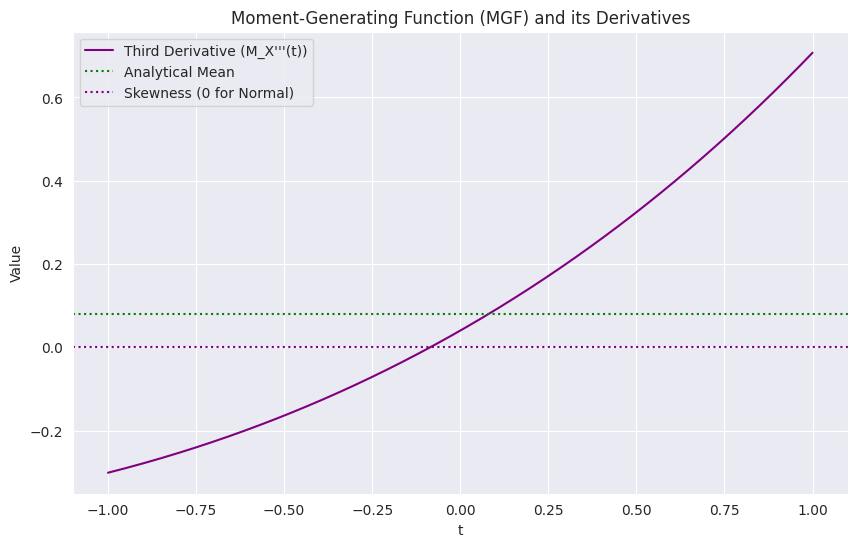

In [38]:
# Problem 13 part c
def third_derivative_mgf(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma ** 2 * t ** 2) * (sigma ** 2 * (3 * t ** 2 + 1) + 6 * mu * t)


t = 0
first_derivative = first_derivative_mgf(t, mu, sigma)
second_derivative = second_derivative_mgf(t, mu, sigma)
third_derivative = third_derivative_mgf(t, mu, sigma)

analytical_mean = mu
analytical_variance = sigma ** 2
analytical_third_moment = mu ** 3 + 3 * mu * sigma ** 2

skewness = (third_derivative - 3 * mu * analytical_variance - mu ** 3) / (analytical_variance ** (3 / 2))

print(f"Numerical third moment (E[X^3]) at t=0: {third_derivative}")
print(f"Analytical third moment: {analytical_third_moment}")
print(f"Numerical skewness: {skewness}")

t_values = np.linspace(-1, 1, 400)

third_derivative_values = np.array([third_derivative_mgf(t, mu, sigma) for t in t_values])

plt.figure(figsize=(10, 6))
plt.plot(t_values, third_derivative_values, label="Third Derivative (M_X'''(t))", color="purple")

plt.axhline(analytical_mean, color='green', linestyle=':', label="Analytical Mean")
plt.axhline(0, color='purple', linestyle=':', label="Skewness (0 for Normal)")

plt.title("Moment-Generating Function (MGF) and its Derivatives")
plt.xlabel("t")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
